### 1. Wczytaj plik CSV z logami app_log.csv

In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
file = Path("../example-files/app_log.csv")
df = pd.read_csv(file)

In [5]:
df.head()

,timestamp,user,action,status_code,danger_level,event_year
0,2025-09-28 09:00:12,anna,/login,200,5,2025
1,2025-09-28 09:00:35,bartek,/login,401,3,2025
2,2025-09-28 09:00:52,celina,/login,200,5,2025
3,2025-09-28 09:01:15,anna,/data,200,5,2025
4,2025-09-28 09:01:25,damian,/login,500,3,2025


### 2. Policz, ilu użytkowników wykonywało żądania do endpointu /login

In [8]:
# number of '/login' requests to the endpoint
int(df[df['action'] == '/login']['user'].count())

23

In [10]:
# number of unique users who requested '/login' to the endpoint
len(df[df['action'] == '/login']['user'].unique())

6

### 3. Oblicz ilość żądań z błędem (status_code różny od 200) dla każdego użytkownika

In [17]:
# number of request errors different from 200 per user
df[df['status_code'] != 200]['user'].value_counts()

user
franek    4
edward    4
damian    3
bartek    2
anna      2
celina    1
Name: count, dtype: int64

### 4. Stwórz tabelę przestawną (pivot table): index: user; kolumny: status_code, wartości: liczba żądań

In [18]:
pivot = df.pivot_table(index=['user'], columns=['status_code'], values=['endpoint'], aggfunc='count', fill_value=0)
pivot.head()

endpoint                
status_code      200 401 403 404 500
user                                
anna               6   0   0   1   1
bartek             5   2   0   0   0
celina             8   1   0   0   0
damian             3   1   1   0   1
edward             4   1   0   1   2

### 5. Posortuj użytkowników wg liczby błędnych żądań malejąco.

In [19]:
stats = df.groupby(['user']).size().reset_index(name='error_count').sort_values(by='error_count', ascending=False)
stats

,user,error_count
2,celina,9
0,anna,8
4,edward,8
1,bartek,7
5,franek,7
3,damian,6


### 5a. Narysuj wykres słupkowy pokazujący liczbę błędnych żądań na użytkownika.

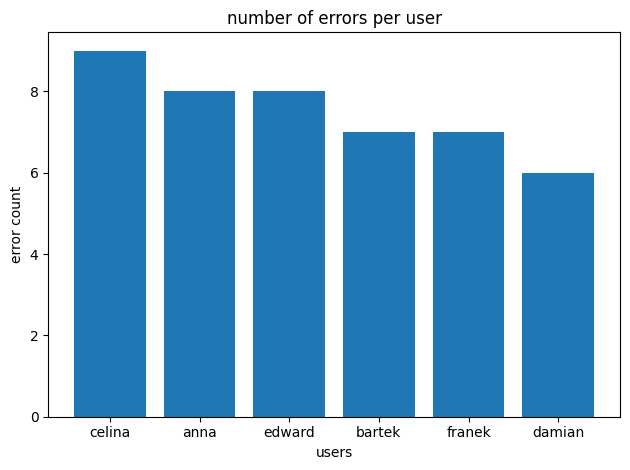

In [20]:
plt.bar(stats['user'], stats['error_count'])
plt.title('number of errors per user')
plt.xlabel('users')
plt.ylabel('error count')
plt.tight_layout()
plt.show()

### 6. Wyznaczy godziny największego ruchu (z resample('1min').size())

In [21]:
df.head()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.resample('1min', on='timestamp').size().sort_values(ascending=False)

timestamp
2025-09-28 09:02:00    5
2025-09-28 09:03:00    5
2025-09-28 09:04:00    5
2025-09-28 09:06:00    5
2025-09-28 09:07:00    5
2025-09-28 09:01:00    4
2025-09-28 09:05:00    4
2025-09-28 09:08:00    4
2025-09-28 09:09:00    4
2025-09-28 09:00:00    3
2025-09-28 09:10:00    1
dtype: int64